# Transfer image style from an image and impose it upon another

In [1]:
# import libraries
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image # pillow for image manipulation
import time
import functools

In [2]:
# # import tensor flow for machine learning
import tensorflow as tf
import tensorflow.contrib.eager as tfe


from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

In [3]:
# import functions
from load_image import load_img
from image_show import imshow
from style_transfer import run_style_transfer
from show_final_images import show_results

### Enable eager_execution

eager_execution: evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later

In [4]:
# enable eager execution
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


In [ ]:
# Set up some global values here
content_path = 'content_images/plant.jpeg'
style_path = '../scrape/images/amedeo-modigliani_Portrait of Maude Abrantes.jpg'

## Visualize Input

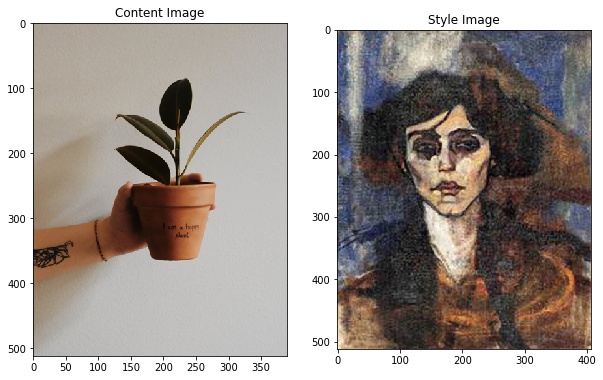

In [ ]:
# display the image
plt.figure(figsize=(10,10))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')
plt.show()

## Preprocess the data

In [ ]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

## Build the model

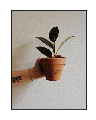

In [ ]:
best, best_loss = run_style_transfer(content_path, 
                                     style_path, num_iterations=3)

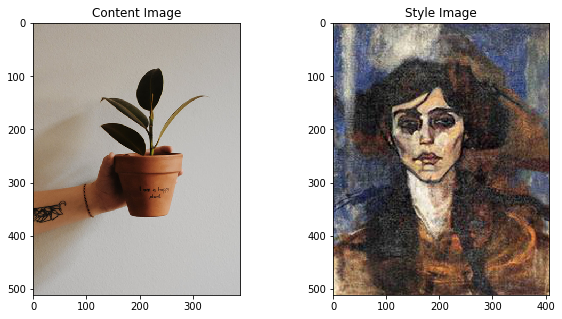

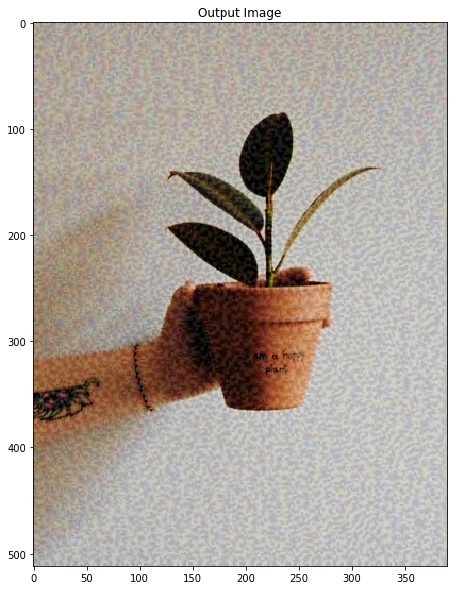

In [ ]:
show_results(best, content_path, style_path)

# Loop through each image transfer and save

In [ ]:
content_path = 'content_images/plant.jpeg'


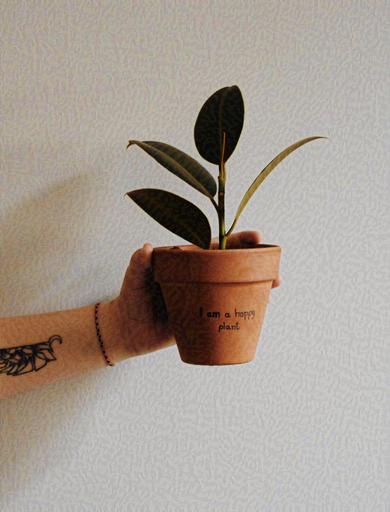

Iteration: 0
Total loss: 4.1153e+08, style loss: 4.1153e+08, content loss: 0.0000e+00, time: 0.1719s
error in simone-martini_Saint Catherine of Alexandria Polyptych.jpg
error in james-ensor_The Oyster Eater.jpg


In [ ]:
# loop over each image
directory = os.fsencode("../scrape/images/")
for filename in os.listdir(directory):
    try:
        file = filename.decode("utf-8") # change bytes to str
        style_path= f'../scrape/images/{file}'
        plt.figure(figsize=(10,10))

        style = load_img(style_path).astype('uint8')

        plt.subplot(1, 2, 1)
        imshow(style, f'{file}')
        best, best_loss = run_style_transfer(content_path, 
                                     style_path, num_iterations=1000)
        show_results(best, content_path, style_path)
    except:
        print(f'error in {file}')
        pass